In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [6]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install yahooquery

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 582.6 kB/s eta 0:00:00 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [8]:
# Raw Package
import numpy as np
import pandas as pd

#Data Source
import yfinance as yf

#Data viz
import plotly.graph_objs as go

from re import search
from yahooquery import Screener

In [9]:
data = yf.download(tickers='ETH-USD', period = '1d', interval = '5m')


[*********************100%***********************]  1 of 1 completed


In [10]:
print(data["Open"])

Datetime
2022-12-28 00:00:00    1212.736572
2022-12-28 00:05:00    1212.922974
2022-12-28 00:10:00    1212.500488
2022-12-28 00:15:00    1212.216309
2022-12-28 00:20:00    1212.189087
                          ...     
2022-12-28 12:40:00    1195.418579
2022-12-28 12:45:00    1195.547852
2022-12-28 12:50:00    1195.452393
2022-12-28 12:55:00    1195.037354
2022-12-28 13:00:00    1195.199951
Name: Open, Length: 157, dtype: float64


In [11]:
def getRates(ticker_input ,period_input  ,interval_input ):
    print(ticker_input+" "+period_input+" "+interval_input )
    data = yf.download(tickers=ticker_input, period = period_input, interval = interval_input)
    return data["Open"] 

In [12]:
def getPercChange(d):
    x=round(d.head(1),6).values
    y=round(d.tail(1),6).values
    perc_chg= np.round( (  (y-x) / abs(x)  ) *100  , 4)
    return perc_chg


In [13]:
def mail2me(pair_text,message_text):
    from email.message import EmailMessage
    import smtplib

    sender = "ozukun83@gmail.com"
    recipient = "ozukun83@gmail.com"
    message = "Crypto Info all"

    #password = input("Type your password and press enter: ")
    password ="o m h c a p w m m w u d "
    email = EmailMessage()
    email["From"] = sender
    email["To"] = recipient
    email["Subject"] = "Crypto Rates Python!"+"  "+pair_text
    email.set_content(message_text)

    smtp = smtplib.SMTP_SSL("smtp.gmail.com")
    smtp.login(sender, password)
    smtp.sendmail(sender, recipient, email.as_string())
    smtp.quit()


In [14]:
# ETH-USD  GET CHANGES FOR 3MONTHS - 1 MONTH -1 WEEK INTERVALS

df3mo=getRates('ETH-USD',  '3mo',  '1h')
print(  getPercChange(df3mo) )
message_input0="ETH-USD',  '3mo',  '1h' CHANGE % " +str( getPercChange(df3mo)[0])

df1mo=getRates('ETH-USD',  '1mo',  '1h')
print(  getPercChange(df1mo) )
message_input1="ETH-USD',  '1mo',  '1h' CHANGE % " +str( getPercChange(df1mo)[0])

dfwk=getRates('ETH-USD',  '1wk',  '1h')
print(  getPercChange(dfwk) )
message_input2="ETH-USD',  '1wk',  '1h' CHANGE % " +str( getPercChange(dfwk)[0])

message_input=message_input0+"\n"+message_input1+"\n"+message_input2

mail2me("ETH-USD",message_input)

ETH-USD 3mo 1h
[*********************100%***********************]  1 of 1 completed
[-8.385]
ETH-USD 1mo 1h
[*********************100%***********************]  1 of 1 completed
[2.1041]
ETH-USD 1wk 1h
[*********************100%***********************]  1 of 1 completed
[-1.6204]


In [15]:
# ALGO-USD  GET CHANGES FOR 3MONTHS - 1 MONTH -1 WEEK INTERVALS

df3mo=getRates('ALGO-USD',  '3mo',  '1h')
print(  getPercChange(df3mo) )
message_input0="ALGO-USD',  '3mo',  '1h' CHANGE % " +str( getPercChange(df3mo)[0])

df1mo=getRates('ALGO-USD',  '1mo',  '1h')
print(  getPercChange(df1mo) )
message_input1="ALGO-USD',  '1mo',  '1h' CHANGE % " +str( getPercChange(df1mo)[0])

dfwk=getRates('ALGO-USD',  '1wk',  '1h')
print(  getPercChange(dfwk) )
message_input2="ALGO-USD',  '1wk',  '1h' CHANGE % " +str( getPercChange(dfwk)[0])

message_input=message_input0+"\n"+message_input1+"\n"+message_input2

mail2me("ALGO-USD",message_input)

ALGO-USD 3mo 1h
[*********************100%***********************]  1 of 1 completed
[-51.869]
ALGO-USD 1mo 1h
[*********************100%***********************]  1 of 1 completed
[-29.8731]
ALGO-USD 1wk 1h
[*********************100%***********************]  1 of 1 completed
[-8.6771]


In [16]:
# get all crypto pairs with USD
def getCryptoPairs():
    s = Screener()
    tickers=[]
    data = s.get_screeners('all_cryptocurrencies_us', count=250)

    # data is in the quotes key
    dicts = data['all_cryptocurrencies_us']['quotes']
    symbols = [d['symbol'] for d in dicts]
    symbols[0]

    for s in symbols:
        if  search("USD", s) and not search("USDT", s) and not search("USDC", s): #\
        #and ( search("ETH",s) or search("DOGE",s) ):
            #print(s+"\n")
            tickers.append(s)
             
    return tickers
        

for cp in getCryptoPairs():
    print(cp)

BTC-USD
ETH-USD
BNB-USD
XRP-USD
BUSD-USD
DOGE-USD
ADA-USD
MATIC-USD
DAI-USD
WTRX-USD
DOT-USD
TRX-USD
LTC-USD
SHIB-USD
STETH-USD
UNI7083-USD
SOL-USD
AVAX-USD
HEX-USD
LEO-USD
WBTC-USD
LINK-USD
XMR-USD
ATOM-USD
TON11419-USD
ETC-USD
BCH-USD
XLM-USD
CRO-USD
OKB-USD
QNT-USD
APE18876-USD
ALGO-USD
VET-USD
NEAR-USD
ICP-USD
FIL-USD
HBAR-USD
FRAX-USD
EOS-USD
USDP-USD
LUNC-USD
WBNB-USD
BTCB-USD
HT-USD
EGLD-USD
BSV-USD
AAVE-USD
TUSD-USD
THETA-USD
FLOW-USD
USDD-USD
XTZ-USD
HBTC-USD
BTTOLD-USD
KCS-USD
CHZ-USD
AXS-USD
SAND-USD
ZEC-USD
GUSD-USD
BTT-USD
BIT11221-USD
MANA-USD
FTM-USD
TWT-USD
CAKE-USD
MKR-USD
GRT6719-USD
PAXG-USD
DASH-USD
KLAY-USD
MIOTA-USD
XAUT-USD
RUNE-USD
NEO-USD
XEC-USD
APT21794-USD
FEI-USD
SNX-USD
GT-USD
MINA-USD
GMX11857-USD
OSMO-USD
NEXO-USD
XRD-USD
USDN-USD
XDC-USD
ETHW-USD
FXS-USD
1INCH-USD
CSPR-USD
IMX10603-USD
LDO-USD
STX4847-USD
FTT-USD
XCN18679-USD
USDJ-USD
DCR-USD
CRV-USD
LRC-USD
MV-USD
ZIL-USD
BAT-USD
XEM-USD
BGB-USD
BAL-USD
NXM-USD
HOT2682-USD
ENJ-USD
TMG-USD
HNT-USD
CVX-U

In [17]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

def getLine(df_input):
    x = df_input.index
    y = df_input.values
    fig = go.Figure(data=go.Scatter(x = x, y = y))
    fig.show()
    

ETH-USD 3mo 1h
[*********************100%***********************]  1 of 1 completed


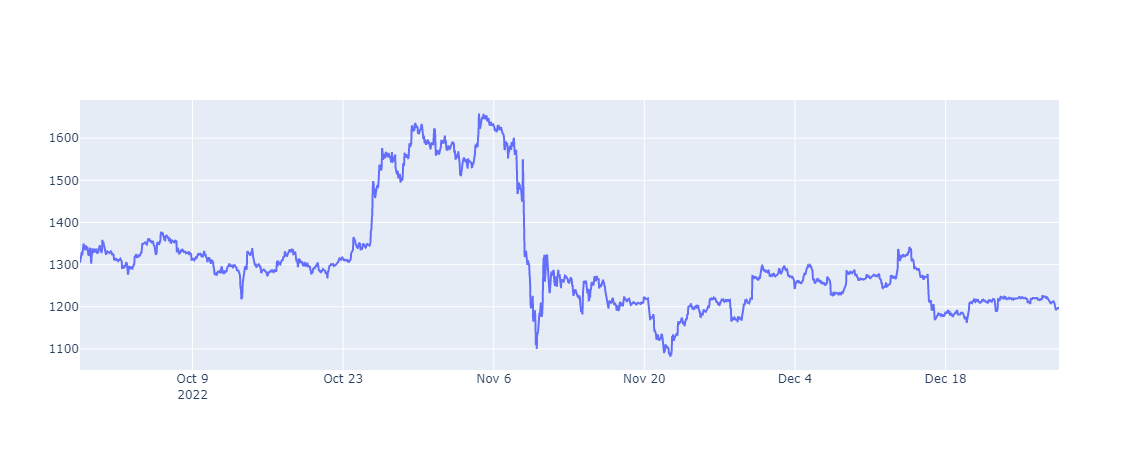

ALGO-USD 3mo 1h
[*********************100%***********************]  1 of 1 completed


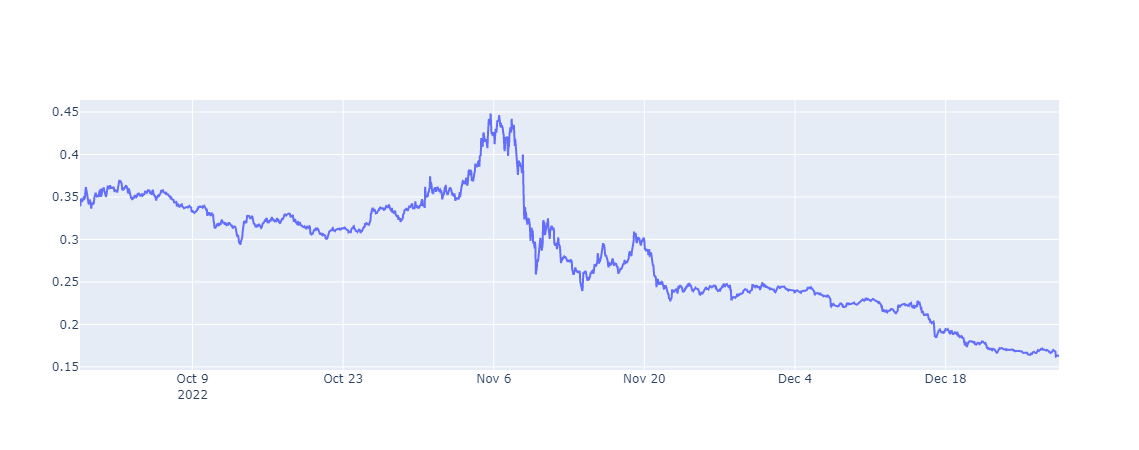

In [18]:
( getLine(getRates('ETH-USD',  '3mo',  '1h')) )
( getLine(getRates('ALGO-USD',  '3mo',  '1h')) )